                                           We are now going to work on our mortgage file..
To quickly explain this file, each line corresponds to a loan granted to one of our customers. Each customer is identified b. his ID
 We have the following informatin
 n
 Tthe city and zip code of the branch where the customer took out the lo


n Tthe customer's monthly income-Mmonthly repayments made by the customer-Dduration of loan, in month

T -type of lo


n Tthe interest rate

Your role this time will be to modify this dataset to calculate the different variables needed to identify customers who are at the limit of their repayment capacity and determine the profits made by the bank.
.

In [67]:
import numpy as np
import pandas as pd
path=r'C:\Users\hp\Desktop\Data_analyst\Python_Pandas\P2C1_clients\prets.csv'

In [68]:
data=pd.read_csv(path)
data.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014


In [69]:
#taux_endettement corresponds to the percentage of income repaid each month by an individual

data['taux_endettement']=round((data['remboursement']*100/data['revenu']),2)
data.head()


,identifiant,ville,CP,revenu,remboursement,duree,type,taux,taux_endettement
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80


In [70]:
#taux to taut_interet to avoid confusion
data.rename(columns={'taux':'taux_interet'}, inplace=True)


In [71]:
data.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80


In [72]:
#cout_total corresponding to the total cost of the loan from repayment and duration
#benefits corresponding to the monthly profits made by the bank on the loan
#We'll simplify the profit calculation here: profit = (C∗T)/24

data['cout_total'] = data['remboursement']* data['duree']
data['benefice'] = round((data['cout_total']*data['taux_interet']/100)/(24),2)


In [73]:
data.sort_values('benefice', ascending= False).head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefice
8,7,NICE,6000,5486.0,2956.95,300,immobilier,1.184,53.9,887085.0,437.63
23,22,NICE,6300,5838.0,3018.25,240,immobilier,1.229,51.7,724380.0,370.94
186,173,PARIS,75006,6784.0,3744.77,180,immobilier,1.248,55.2,674058.6,350.51
242,226,PARIS,75002,5098.0,2910.96,240,immobilier,1.140,57.1,698630.4,331.85
181,168,PARIS,75003,6366.0,2807.41,240,immobilier,1.176,44.1,673778.4,330.15


The following requests have been made by the head of our lending department:

- The authorized debt ratio is 35%. Could you tell me how many people have exceeded this threshold?

- Same question, but this time only for the Paris branch.

- To facilitate the processing of future loan applications, could you add a risk variable that would enable us to easily identify risky customers?

- How many car loans have been granted? What is the average total cost of these loans?

- What is the total monthly profit made by the Toulouse branch?aine ?

In [74]:
#the number of people having exceeded this 35% threshold

clients_risque = data.loc[data['taux_endettement']>35,:]
print('The number of customers who have exceeded the threshold is:',clients_risque.shape[0])

The number of customers who have exceeded the threshold is: 58


In [75]:
#For the Paris branch

client_risque_Paris = data.loc[(data['taux_endettement']>35) & (data['ville']=='PARIS'),:]
print('The number of Parisian customers exceeding the threshold is:',client_risque_Paris.shape[0])

The number of Parisian customers exceeding the threshold is: 16


In [76]:
#Creation of the risky column (debt ratio > 35%)
data['risque']='Non'
data.loc[data['taux_endettement']>35, 'risque']='OUI'
data.sort_values('taux_endettement', ascending=False)

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefice,risque
61,60,MARSEILLE,13012,1201.0,688.17,240,immobilier,1.113,57.30,165160.8,76.59,OUI
242,226,PARIS,75002,5098.0,2910.96,240,immobilier,1.140,57.10,698630.4,331.85,OUI
138,130,MARSEILLE,13007,2631.0,1473.36,240,immobilier,1.086,56.00,353606.4,160.01,OUI
187,174,MARSEILLE,13009,1533.0,850.82,180,immobilier,1.048,55.50,153147.6,66.87,OUI
219,205,BORDEAUX,33100,2835.0,1567.76,180,immobilier,1.085,55.30,282196.8,127.58,OUI
...,...,...,...,...,...,...,...,...,...,...,...,...
100,95,PARIS,75016,6069.0,341.40,24,automobile,3.644,5.63,8193.6,12.44,Non
67,64,LYON,69004,4326.0,236.10,46,automobile,3.124,5.46,10860.6,14.14,Non
240,224,PARIS,75008,5118.0,238.20,25,automobile,3.423,4.65,5955.0,8.49,Non
106,101,LYON,69008,4737.0,214.80,47,automobile,3.487,4.53,10095.6,14.67,Non


In [77]:
#How many car loans have been granted? 
#What is the average total cost?
prets_auto = data.loc[data['type']=='automobile',:]
cout_total_moyen= round(data.loc[data['type']=='automobile','cout_total'].mean(),2)

print(' the number of car loans granted is:',prets_auto.shape[0],' with an average cost of:',cout_total_moyen)


 the number of car loans granted is: 16  with an average cost of: 13665.0


In [78]:
# total monthly profit generated by the Toulouse agency
benefice_toulouse = data.loc[data['ville']=='TOULOUSE', 'benefice'].sum()
print('the Toulouse agency\'s total monthly profit is:',round(benefice_toulouse,2))

the Toulouse agency's total monthly profit is: 2138.07


Hello,

I have several requests that I'd like you to process as soon as you can. We'll need them for the board meeting this weekend. Could you :

create a customer profile data frame to have all the information about each customer summarized in one line ;

calculate the exact number of people in a risky banking situation, based on the debt ratio and these customer profiles ;

calculate the total profit generated by each of our branches, by loan type ;

calculate the average profit made by each branch, for each type of loan, in the form of a double-entry table ;

tell me which city would be the most interesting to develop home loans in ? in advance.

In [79]:
#Profil client par somme (remboursement,taux_endettement,cout_total,benefice)
profil_client=data.groupby('identifiant')[['remboursement','taux_endettement','cout_total','benefice']].sum()
profil_client.reset_index()
profil_client.head()

,remboursement,taux_endettement,cout_total,benefice
identifiant,,,,
0,1130.05,30.80,271212.0,131.99
1,1487.85,28.02,389715.0,206.66
2,552.54,29.50,132609.6,53.71
3,586.03,34.80,105485.4,44.57
4,423.61,28.70,101666.4,51.21


In [80]:
#Recalculate the exact number of people in risky banking situations based on the debt ratio:
personne_risque=profil_client.loc[profil_client['taux_endettement']>35,:]
print(' le nombre de personne en situation risque est :',personne_risque.shape[0])

 le nombre de personne en situation risque est : 62


In [81]:
#the profit generated by each of our branches, by type of loan
profit= data.groupby(['ville','type'])['benefice'].sum()
profit

ville      type      
BORDEAUX   immobilier    1681.32
LYON       automobile      47.39
           immobilier    2967.41
MARSEILLE  automobile      61.36
           immobilier    4334.55
NICE       automobile      31.15
           immobilier    2651.60
PARIS      automobile      99.50
           immobilier    9916.85
TOULOUSE   automobile      61.22
           immobilier    2076.85
Name: benefice, dtype: float64

In [82]:
#average profits achieved by each agency, for each type of loan
profit_agence_type = data.pivot_table(index='ville',columns='type',values='benefice',aggfunc=np.mean)
profit_agence_type

C:\Users\hp\AppData\Local\Temp\ipykernel_10100\1137666163.py:2: FutureWarning: The provided callable <function mean at 0x0000018B58309440> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  profit_agence_type = data.pivot_table(index='ville',columns='type',values='benefice',aggfunc=np.mean)


type,automobile,immobilier
ville,,
BORDEAUX,NaN,105.082500
LYON,15.796667,118.696400
MARSEILLE,20.453333,60.202083
NICE,15.575000,139.557895
PARIS,19.900000,137.734028
TOULOUSE,20.406667,86.535417


In [83]:
# the most attractive city in which to develop real estate loans
mac = profit_agence_type.reset_index()
mac.sort_values('immobilier', ascending=False)



type,ville,automobile,immobilier
3,NICE,15.575000,139.557895
4,PARIS,19.900000,137.734028
1,LYON,15.796667,118.696400
0,BORDEAUX,NaN,105.082500
5,TOULOUSE,20.406667,86.535417
2,MARSEILLE,20.453333,60.202083


In [84]:
print('the most interesting city in terms of mortgages is: NICE')

the most interesting city in terms of mortgages is: NICE


                                                         Draw graphs 
                                                                    
You are in the process of preparing the monthly report to be presented to your manager at the end of each month. The presentation will need to include some key graphs, so you'll need to use your data visualization skills to produce the various visualizations expected.

The graphs to be produced are

- proportion of loans by type of loan
  
- Monthly profit as a function of customer income for real estate loans only

- Distribution of realized profits

- Total monthly profit per branch

In [85]:
#proportion of loans by type of loan
proportion = data.groupby('type').size().reset_index()
proportion.columns=['Type','Number']
proportion

,Type,Number
0,automobile,16
1,immobilier,228


<BarContainer object of 2 artists>

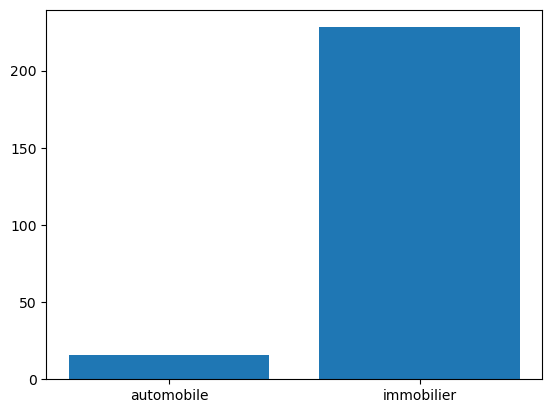

In [86]:
import matplotlib.pyplot as plt
plt.bar(height=proportion['Number'],x=proportion['Type'])

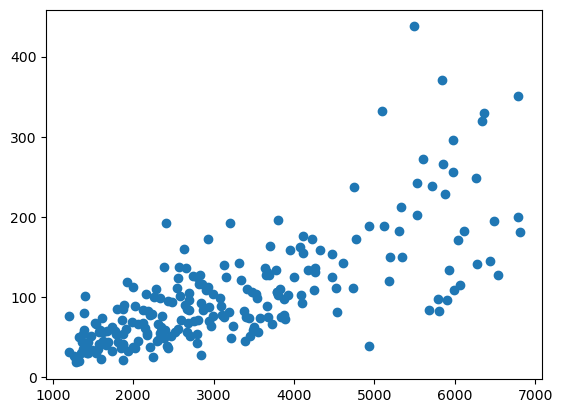

In [87]:
# Monthly profit as a function of customer income for real estate loans only
profit_mor = data.loc[data['type']=='immobilier',:]
plt.scatter(profit_mor['revenu'],profit_mor['benefice'])

In [ ]:
import seaborn as sns
sns.scatterplot(data=data, x='revenu', y='benefices', hue='ville')
plt.show()

(array([63., 77., 57., 20., 12.,  7.,  2.,  4.,  1.,  1.]),
 array([  8.49 ,  51.404,  94.318, 137.232, 180.146, 223.06 , 265.974,
        308.888, 351.802, 394.716, 437.63 ]),
 <BarContainer object of 10 artists>)

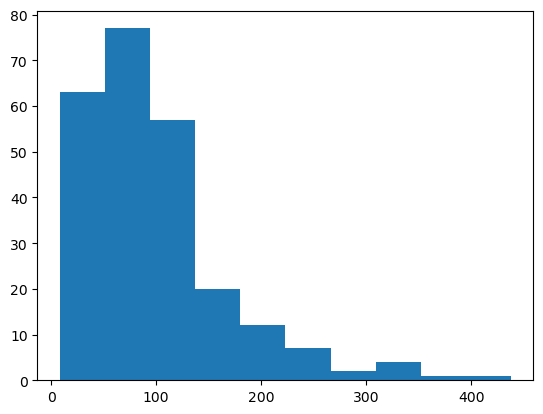

In [88]:
#Distribution of realized profits
plt.hist(data['benefice'])


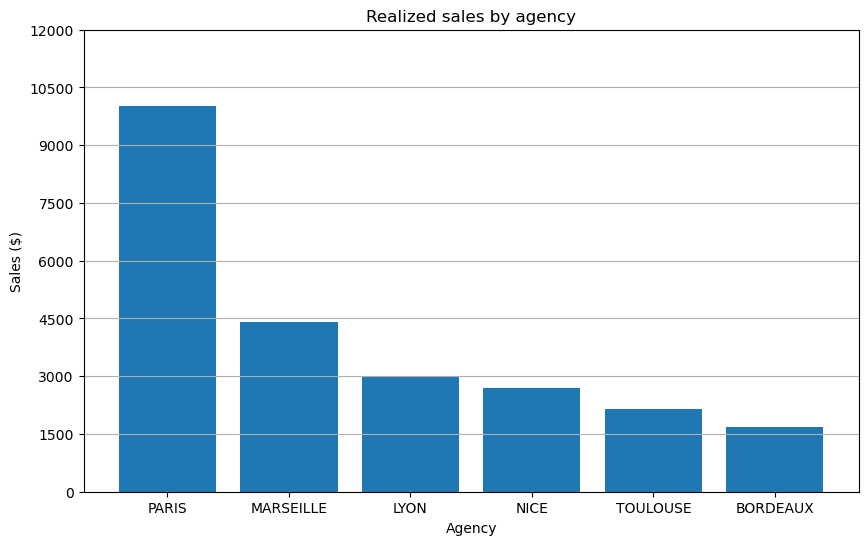

In [89]:
#Total monthly profit per branch
profit= data.groupby('ville')['benefice'].sum().reset_index().sort_values('benefice', ascending=False)
plt.figure(figsize=(10,6))
plt.bar(height=profit['benefice'],x=profit['ville'])
plt.title("Realized sales by agency", )
plt.xlabel("Agency")
plt.ylabel('Sales ($)')
plt.grid(axis='y')
plt.ylim(0,12000)
plt.yticks([0,1500,3000,4500,6000,7500,9000,10500,12000])
plt.show()

Monthly profits for the year 2021 have just been released by loan type at branch level. As part of your monthly reporting, you have been asked to produce a specific graph showing the evolution of monthly profits over the year, by loan type.


In [90]:
profits_2021= pd.read_csv('ca.csv')
profits_2021['date'] = pd.to_datetime(profits_2021['date'])
profits_2021

,date,immobilier,automobile,consommation
0,2021-01-01,10439,5096,3808
1,2021-02-01,11266,5146,5838
2,2021-03-01,11315,5276,5601
3,2021-04-01,11456,5067,3639
4,2021-05-01,10816,4937,5273
5,2021-06-01,11988,5026,4133
6,2021-07-01,11267,5228,5253
7,2021-08-01,10179,5462,4822
8,2021-09-01,10627,4698,5099
9,2021-10-01,10082,5825,2002


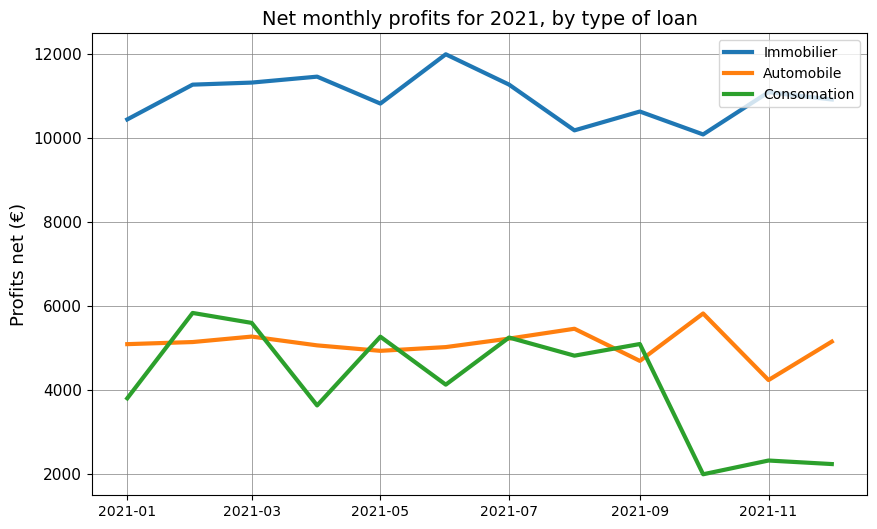

In [91]:
plt.figure(figsize=(10,6))
plt.plot(profits_2021['date'],profits_2021['immobilier'], label='Immobilier', linewidth=3)
plt.plot(profits_2021['date'],profits_2021['automobile'], label='Automobile', linewidth=3)
plt.plot(profits_2021['date'],profits_2021['consommation'], label='Consomation', linewidth=3)
plt.legend(loc='upper right')
plt.ylabel('Profits net (€)', fontsize=13)
plt.yticks(fontsize=11)
plt.title("Net monthly profits for 2021, by type of loan", fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

